타이타닉 탑승자들 중 일부의 인적 정보와 생존 여부 데이터
(train.csv / test.csv)

- PassengerID : 탑승객 고유 아이디
- Survival : 탑승객 생존 유무 (0: 사망, 1: 생존)
- Pclass : 등실의 등급
- Name : 이름
- Sex : 성별
- Age : 나이
- Sibsp : 함께 탐승한 형제자매, 아내, 남편의 수
- Parch : 함께 탐승한 부모, 자식의 수
- Ticket :티켓 번호
- Fare : 티켓의 요금
- Cabin : 객실번호
- Embarked : 배에 탑승한 항구 이름 ( C = Cherbourn, Q = Queenstown, S = Southampton)


<hr/>

# 1. 데이터 불러오기

In [2]:
import pandas as pd

In [32]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
submission = pd.read_csv('./data/submission.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


제출 파일 확인

In [4]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [5]:
submission.to_csv('submission.csv',index=False)

기본 파일 제출 : 0.7469814995

# 2. EDA

In [6]:
print(train.shape)
print(test.shape)
print(submission.shape)

(891, 12)
(418, 11)
(418, 2)


### 2-1. 결측치 확인

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Age(float), Fare(float), Cabin(object) 결측치 존재

Age 결측치 평균으로 채우기
Fare 결측치 평균으로 채우기

In [10]:
mean_age = train['Age'].mean()
mean_fare = train['Fare'].mean()

train['Age'] = train['Age'].fillna(mean_age)
test['Age'] = test['Age'].fillna(mean_age)
train['Fare'] = train['Fare'].fillna(mean_fare)
test['Fare'] = test['Fare'].fillna(mean_fare)

In [11]:
train['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

Cabin의 대푯값을 정할 수 없음

### 2-2. 시각화

종속변수 분포 확인 (Survived)

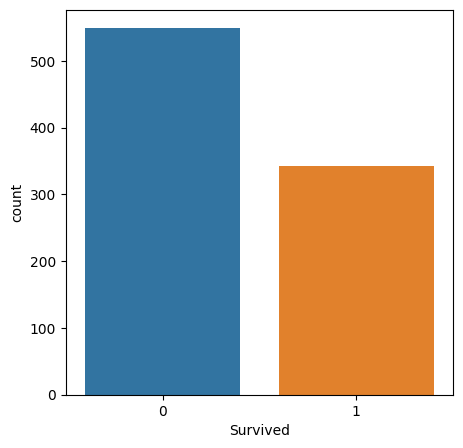

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(5,5))
sns.countplot(x=train['Survived'])
plt.show()

# 데이터 불균형

독립변수 분포 확인 - 범주형 변수

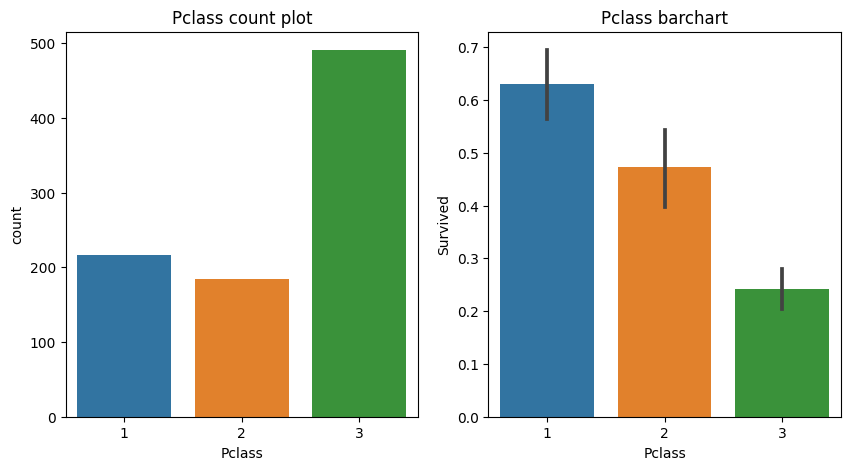

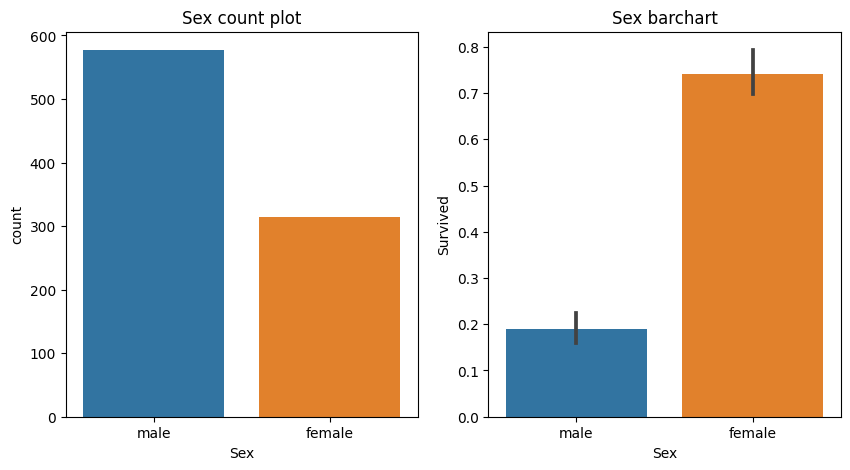

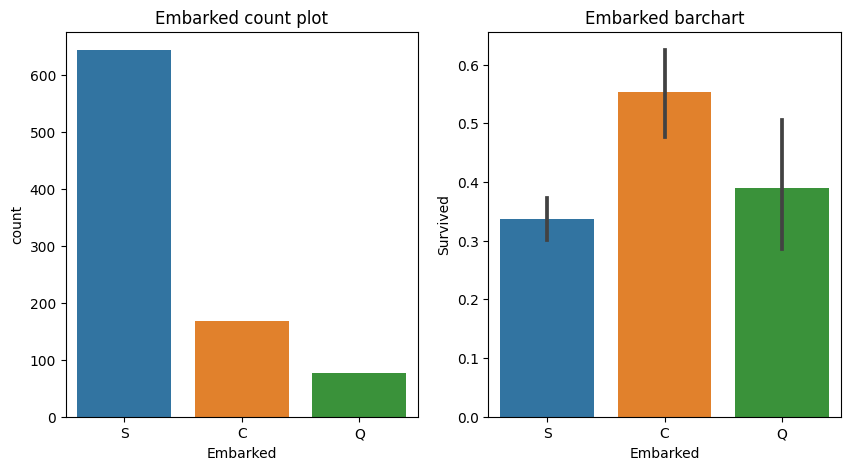

In [13]:
# 등실 등급 / 성별 / 탑승한 항구 이름
object_columns = ['Pclass','Sex','Embarked']
for col in object_columns:
    fig,ax = plt.subplots(ncols=2,figsize=(10,5))
    sns.countplot(x=train[col],ax=ax[0]).set(title=col+' count plot')
    sns.barplot(data=train,x=col,y='Survived',ax=ax[1]).set(title=col+' barchart')

# 등실 등급에 따른 생존률 차이가 크다.
# 남성의 수가 훨씬 많지만 여성의 생존률이 더 높다.
# 탑승 항구에 따른 생존률 차이도 크다.

독립변수 분포 확인 - 수치형 변수

In [14]:
# 생존유무를 문자로 나타내기
train['Survived_str'] = train['Survived'].apply(lambda x:'death' if x == 0 else 'survival')

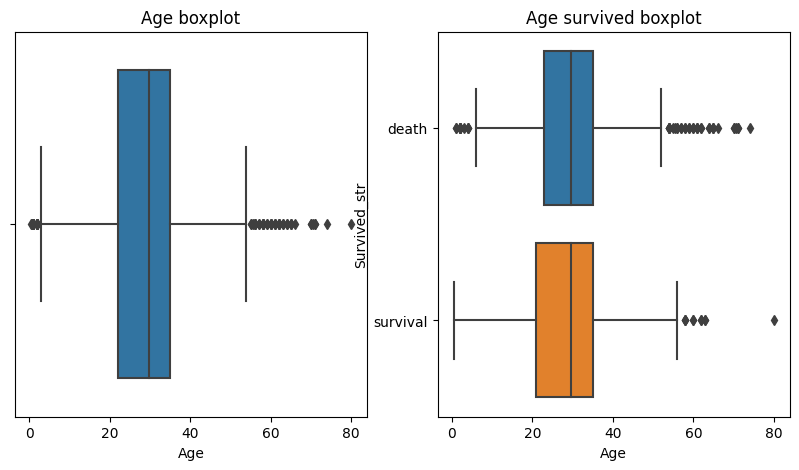

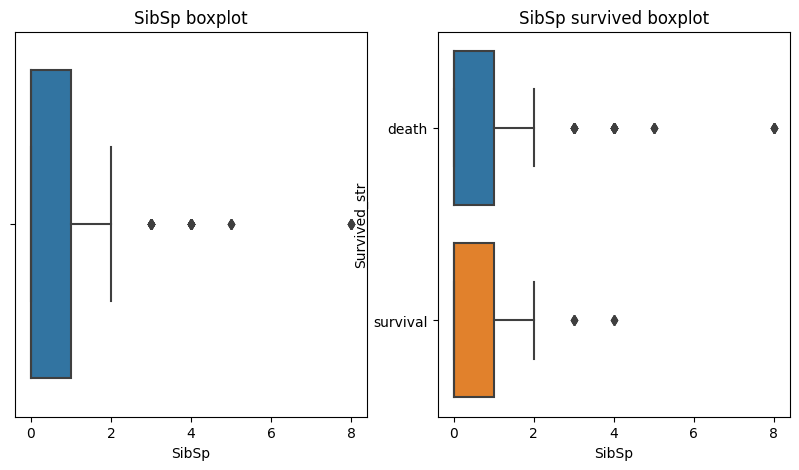

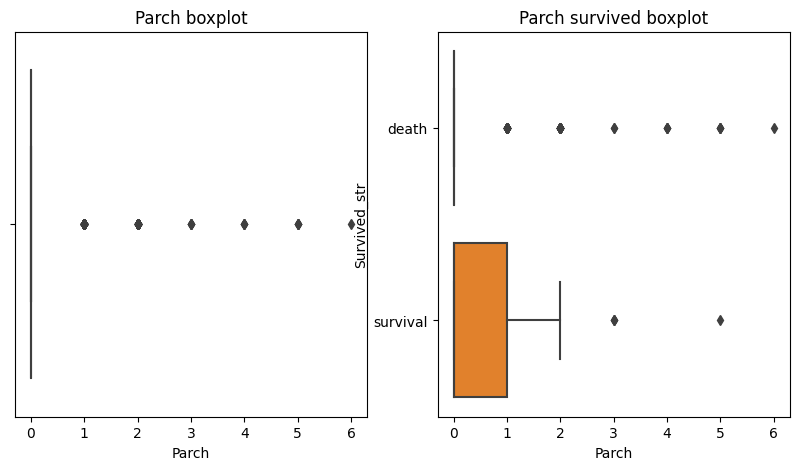

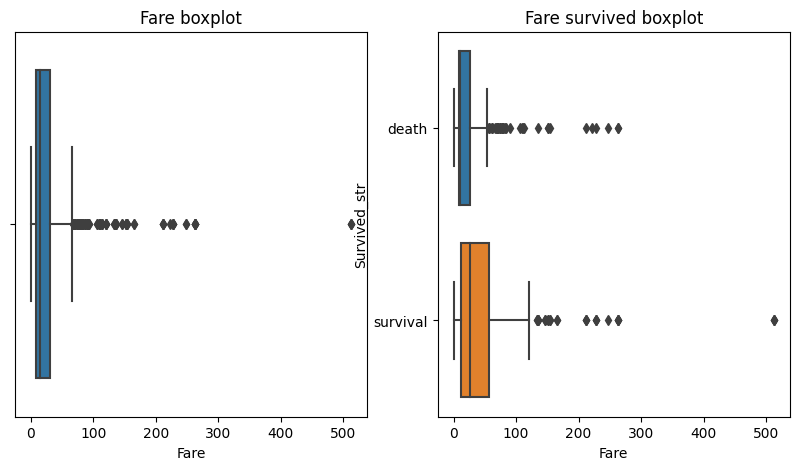

In [15]:
# 나이 / 함께 탑승한 형제자매,아내,남편의 수 / 함께 탑승한 부모,자식의 수, 티켓의 요금
float_columns = ['Age', 'SibSp', 'Parch', 'Fare']
for col in float_columns:
    fig,ax = plt.subplots(ncols=2,figsize=(10,5))
    sns.boxplot(x=train[col],ax=ax[0]).set(title=col+' boxplot')
    sns.boxplot(data=train,x=col,y='Survived_str',ax=ax[1]).set(title=col+' survived boxplot')

In [16]:
train[float_columns].describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,13.002015,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.699118,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


# 3. 전처리

In [17]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived_str'],
      dtype='object')

In [18]:
float_columns = ['Age', 'SibSp', 'Parch', 'Fare']
object_columns = ['Pclass','Sex','Embarked']
train = train[float_columns+object_columns+['Survived']]
test = test[float_columns+object_columns]

독립변수
- 범주형 : ['Pclass','Sex','Embarked']
- 수치형 : ['Age', 'SibSp', 'Parch', 'Fare']

종속변수
- Survived

In [19]:
# 수치형 - 표준화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train[float_columns])
train[float_columns] = scaler.transform(train[float_columns])
test[float_columns] = scaler.transform(test[float_columns])

In [20]:
# 범주형 - 카테고리화
train = pd.get_dummies(train,columns=object_columns)
test = pd.get_dummies(test,columns=object_columns)

In [21]:
train.head(1)

,Age,SibSp,Parch,Fare,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,-0.592481,0.432793,-0.473674,-0.502445,0,False,False,True,False,True,False,False,True


In [22]:
train_x = train.drop(columns='Survived')
train_y = train['Survived']

# 4. 모델

In [23]:
# 학습데이터 검증데이터 나누기
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(train_x,train_y,test_size=0.2,random_state=0)

0/1로 분류 -> 로지스틱 회귀

In [24]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_x,train_y)

# 예측
val_pred = lr.predict(val_x)
val_pred


array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [25]:
# 모델 성능 평가
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(val_y,val_pred)
print(accuracy)

0.8044692737430168


In [26]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(val_y,val_pred))

0.792292490118577


# 5. 결과 

In [27]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [28]:
test_pred = lr.predict(test)
sub = submission.copy()
sub['Survived'] = test_pred
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [29]:
sub.shape

(418, 2)

In [31]:
sub.to_csv('./sub/sub_logisticRegression.csv',index=False)
# 0.7533106134